In [1]:
import numpy as np
import pandas as pd

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203738


,s1,s2,s3,s4,s5
0,88,94,92,89,82
1,89,88,99,89,80
2,85,80,87,99,88
3,93,88,81,90,87
4,96,98,94,85,97


In [3]:
df.tail()

,s1,s2,s3,s4,s5
39995,24,20,3,21,15
39996,13,26,14,13,3
39997,17,22,12,6,31
39998,25,30,17,25,11
39999,2,7,18,26,8


# Symbolic AI

In [4]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,88,94,92,89,82,500,445,89.0,A+
1,89,88,99,89,80,500,445,89.0,A+
2,85,80,87,99,88,500,439,87.8,A+
3,93,88,81,90,87,500,439,87.8,A+
4,96,98,94,85,97,500,470,94.0,A+
...,...,...,...,...,...,...,...,...,...
39995,24,20,3,21,15,500,83,16.6,Fail
39996,13,26,14,13,3,500,69,13.8,Fail
39997,17,22,12,6,31,500,88,17.6,Fail
39998,25,30,17,25,11,500,108,21.6,Fail


In [5]:
df.Grade.value_counts()
# Fail    39988
# A+      39744
# D       29203
# C       29012
# B       29006
# A       28925
# E        7776

Fail    39972
A+      39740
A       29096
C       29083
B       29062
D       29009
E        7776
Name: Grade, dtype: int64

In [6]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7776)])
    test = pd.concat([test,df[df.Grade==i].head(100)])
print(len(df1))
print(len(test))

54432
700


# Create data for ML

In [9]:
data = df1[["s1","s2","s3",'s4','s5',"Percentage",'Grade']].copy()
data = data.sample(frac=1)
print(len(data))
data

54432


,s1,s2,s3,s4,s5,Percentage,Grade
6077,78,76,74,72,70,74.0,A
769,91,83,95,84,94,89.4,A+
5003,0,8,21,26,14,13.8,Fail
3514,76,74,74,70,77,74.2,A
7518,61,65,62,61,68,63.4,B
...,...,...,...,...,...,...,...
3645,73,74,70,74,74,73.0,A
1067,5,11,7,22,31,15.2,Fail
2677,75,70,71,76,75,73.4,A
7396,80,82,91,91,83,85.4,A+


In [9]:
data.corr()

,s1,s2,s3,s4,s5,Percentage
s1,1.000000,0.961079,0.961584,0.961478,0.961096,0.984472
s2,0.961079,1.000000,0.960895,0.961855,0.960543,0.984270
s3,0.961584,0.960895,1.000000,0.961271,0.961040,0.984364
s4,0.961478,0.961855,0.961271,1.000000,0.961103,0.984532
s5,0.961096,0.960543,0.961040,0.961103,1.000000,0.984139
Percentage,0.984472,0.984270,0.984364,0.984532,0.984139,1.000000


<AxesSubplot:>

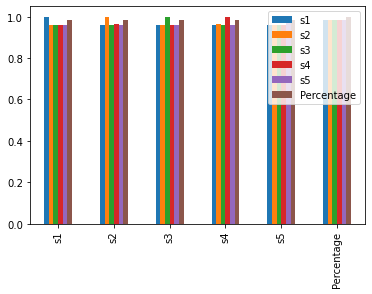

In [10]:
data.corr().plot(kind='bar')

In [10]:
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}

data['Grade1'] = data.Grade.map(grades)# map with dictionary
data

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
6077,78,76,74,72,70,74.0,A,6
769,91,83,95,84,94,89.4,A+,7
5003,0,8,21,26,14,13.8,Fail,1
3514,76,74,74,70,77,74.2,A,6
7518,61,65,62,61,68,63.4,B,5
...,...,...,...,...,...,...,...,...
3645,73,74,70,74,74,73.0,A,6
1067,5,11,7,22,31,15.2,Fail,1
2677,75,70,71,76,75,73.4,A,6
7396,80,82,91,91,83,85.4,A+,7


C:\Users\saylani\AppData\Local\Temp\ipykernel_8164\759093254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar')


<AxesSubplot:>

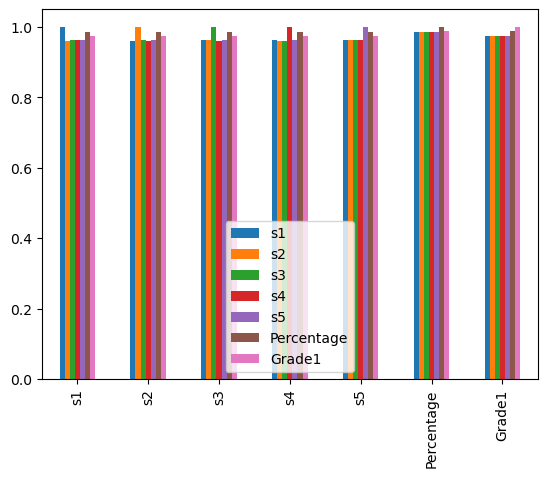

In [13]:
data.corr().plot(kind='bar')

C:\Users\saylani\AppData\Local\Temp\ipykernel_8164\2545985938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar', legend=False)


<AxesSubplot:>

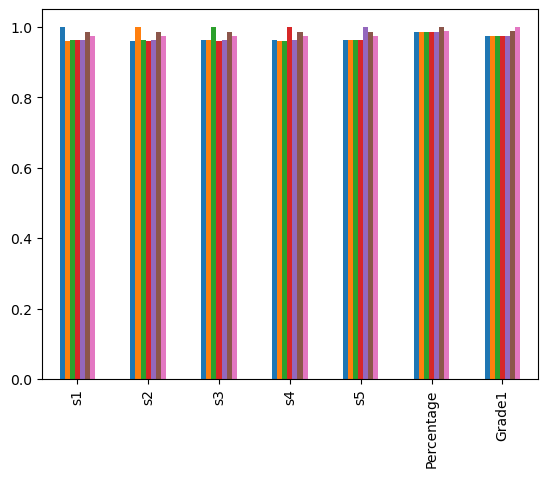

In [14]:
data.corr().plot(kind='bar', legend=False)

In [15]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989181
Grade1,0.989181,1.000000


# Find Grade (Rules) with Machine Learning

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<img src="https://www.researchgate.net/profile/Nimmisha-Shajihan/publication/347447352/figure/fig3/AS:970048604741634@1608289018974/Performance-measurement-TP-TN-FP-FN-are-the-parameters-used-in-the-evaluation-of.jpg">
<img src="https://miro.medium.com/max/974/1*CNWo23_VnUJPXdfrqbiB0g.jpeg">

<img src="https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg">

<img src="https://i.ytimg.com/vi/ji48Lz6amMc/maxresdefault.jpg">

In [17]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989181
Grade1,0.989181,1.000000


# Now select the feature based on above stats technique

In [18]:
data.head()

,s1,s2,s3,s4,s5,Percentage,Grade,Grade1
6077,78,76,74,72,70,74.0,A,6
769,91,83,95,84,94,89.4,A+,7
5003,0,8,21,26,14,13.8,Fail,1
3514,76,74,74,70,77,74.2,A,6
7518,61,65,62,61,68,63.4,B,5


In [19]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade



In [24]:
print(type(X), len(X), type(X.values[0]))
X.head()

<class 'pandas.core.frame.DataFrame'> 54432 <class 'numpy.ndarray'>


,Percentage
6077,74.0
769,89.4
5003,13.8
3514,74.2
7518,63.4


In [26]:
print(type(Y),len(Y), type(Y.values[0]))
Y.head()

<class 'pandas.core.series.Series'> 54432 <class 'str'>


6077       A
769       A+
5003    Fail
3514       A
7518       B
Name: Grade, dtype: object

# Split data in Training and Test dataset
* X_train, X_test 
* Y_train, Y_test

In [28]:
print("X len",len(X),"Y len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=True)

print(len(X_train), "X Train len")
print(len(Y_train),"Y train len")
print(len(X_test), "X_test len")
print(len(Y_test), "Y_test")

X len 54432 Y len 54432
train X 38102
38102 X Train len
38102 Y train len
16330 X_test len
16330 Y_test


# Classifier

In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf = clf.fit(X_train, Y_train)

https://www.google.com/search?q=entropy+and+gini+index+decision+tree&source=lmns&tbm=vid&bih=636&biw=1296&hl=en&sa=X&ved=2ahUKEwjA7oW31J79AhXhpCcCHXgrAp0Q_AUoAnoECAEQAg

* entropy
* gini index

In [32]:
X_test

,Percentage
2819,63.0
3511,36.6
3633,63.0
685,65.0
26040,36.2
...,...
346,55.0
2350,53.6
4914,64.0
3736,63.6


In [33]:
Y_predict = clf.predict(X_test)
Y_predict

array(['B', 'E', 'B', ..., 'B', 'B', 'C'], dtype=object)

In [35]:
abc = X_test.copy()
abc['Actual_Y'] = Y_test
abc['predication'] = clf.predict(X_test)# add prediction column

abc

,Percentage,Actual_Y,predication
2819,63.0,B,B
3511,36.6,E,E
3633,63.0,B,B
685,65.0,B,B
26040,36.2,E,E
...,...,...,...
346,55.0,C,C
2350,53.6,C,C
4914,64.0,B,B
3736,63.6,B,B


In [36]:
print(metrics.classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2283
          A+       1.00      1.00      1.00      2375
           B       1.00      1.00      1.00      2381
           C       1.00      1.00      1.00      2349
           D       1.00      1.00      1.00      2304
           E       1.00      1.00      1.00      2316
        Fail       1.00      1.00      1.00      2322

    accuracy                           1.00     16330
   macro avg       1.00      1.00      1.00     16330
weighted avg       1.00      1.00      1.00     16330



In [44]:
clf.predict([[61]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

# Display learning Rules

In [45]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.2222222222222222, 0.9166666666666666, 'X[0] <= 31.4\ngini = 0.857\nsamples = 38102\nvalue = [5493, 5401, 5395, 5427, 5472, 5460, 5454]\nclass = y[0]'),
 Text(0.1111111111111111, 0.75, 'gini = 0.0\nsamples = 5454\nvalue = [0, 0, 0, 0, 0, 0, 5454]\nclass = y[6]'),
 Text(0.3333333333333333, 0.75, 'X[0] <= 39.3\ngini = 0.833\nsamples = 32648\nvalue = [5493, 5401, 5395, 5427, 5472, 5460, 0]\nclass = y[0]'),
 Text(0.2222222222222222, 0.5833333333333334, 'gini = 0.0\nsamples = 5460\nvalue = [0, 0, 0, 0, 0, 5460, 0]\nclass = y[5]'),
 Text(0.4444444444444444, 0.5833333333333334, 'X[0] <= 49.0\ngini = 0.8\nsamples = 27188\nvalue = [5493, 5401, 5395, 5427, 5472, 0, 0]\nclass = y[0]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 5472\nvalue = [0, 0, 0, 0, 5472, 0, 0]\nclass = y[4]'),
 Text(0.5555555555555556, 0.4166666666666667, 'X[0] <= 69.0\ngini = 0.75\nsamples = 21716\nvalue = [5493, 5401, 5395, 5427, 0, 0, 0]\nclass = y[0]'),
 Text(0.3333333333333333, 0.25, 'X

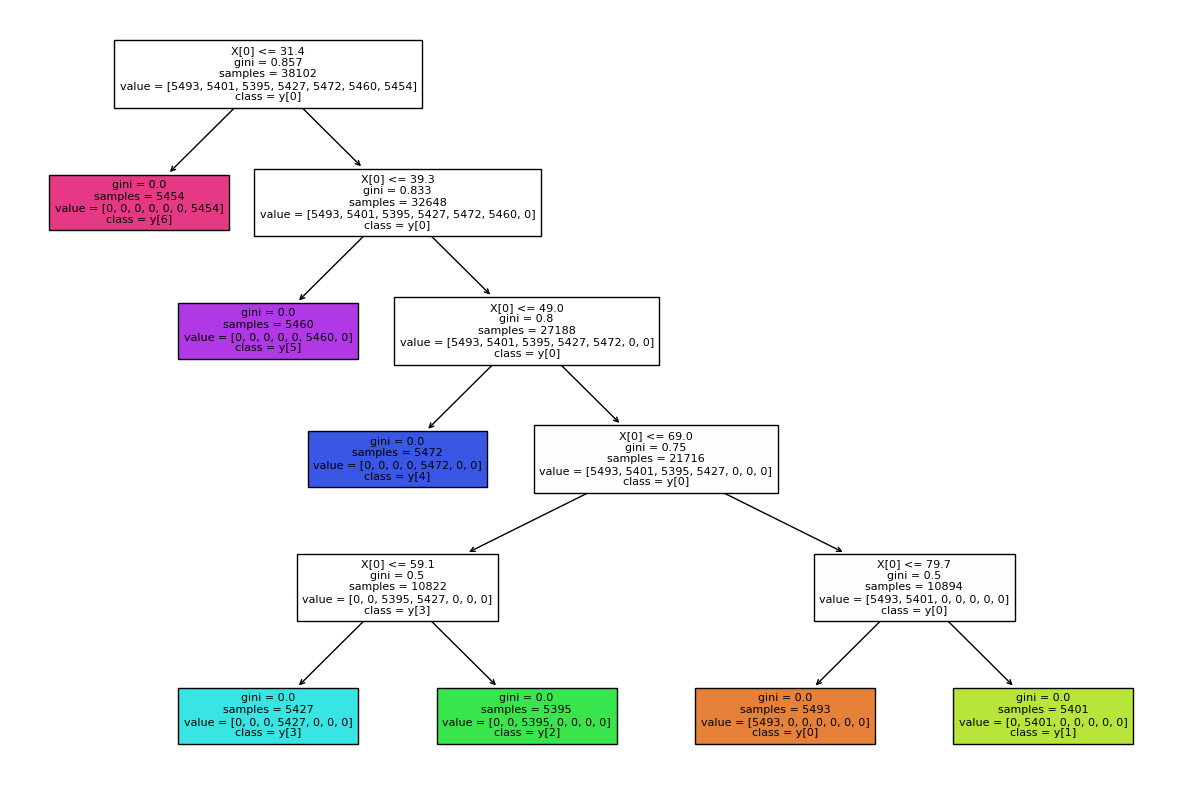

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)

<img src="https://www.researchgate.net/profile/Jessica-Pickles-2/publication/339279807/figure/fig1/AS:891889284829201@1589654384981/Random-forests-are-collections-of-randomised-decision-trees-A-A-single-decision-tree.ppm">